In [17]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv("spam.csv", encoding='latin')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
451,ham,Thanks for this hope you had a good day today,NaN,NaN,NaN
1315,ham,"Whenevr ur sad, Whenevr ur gray, Remembr im he...",NaN,NaN,NaN
2552,ham,"Oh fine, I'll be by tonight",NaN,NaN,NaN
4416,ham,says that he's quitting at least5times a day ...,NaN,NaN,NaN
4548,ham,"Haha, my friend tyler literally just asked if ...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4456,ham,Aight should I just plan to come up later toni...
668,ham,Have a good evening! Ttyl
362,ham,Check audrey's status right now
5218,ham,I accidentally brought em home in the box
4529,ham,Don't forget though that I love you .... And I...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3050,ham,Awesome question with a cute answer: Someone a...
1681,ham,Y lei?
1910,ham,Becoz its &lt;#&gt; jan whn al the post ofic...
1622,spam,U have a secret admirer who is looking 2 make ...
323,ham,That would be great. We'll be at the Guild. Co...


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
# check for duplicate values
df.duplicated().sum()

403

In [23]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

## 2.EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

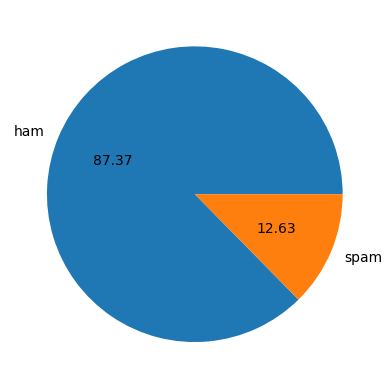

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
# Data is imbalanced

In [31]:
import nltk

     ---------------------------------------- 0.0/41.9 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.9 kB ? eta -:--:--
     -------------------------------------  41.0/41.9 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 41.9/41.9 kB 502.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 751.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 3.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.5 MB 1.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 1.5 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 1.2 MB/s eta 0:00:02
   -------- ---------

In [32]:
df['num_characters'] = df['text'].apply(len)

In [33]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [46]:
import seaborn as sns

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


<Axes: xlabel='num_characters', ylabel='Count'>

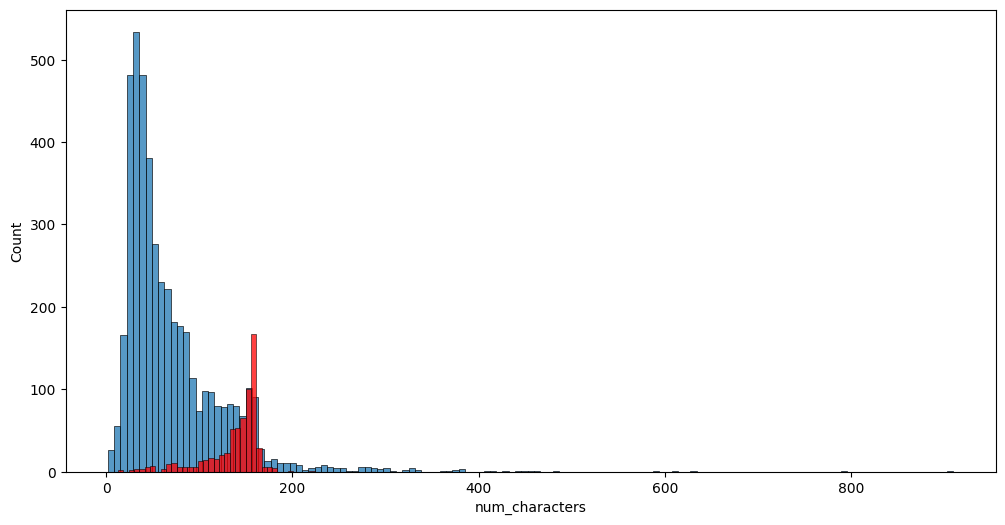

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

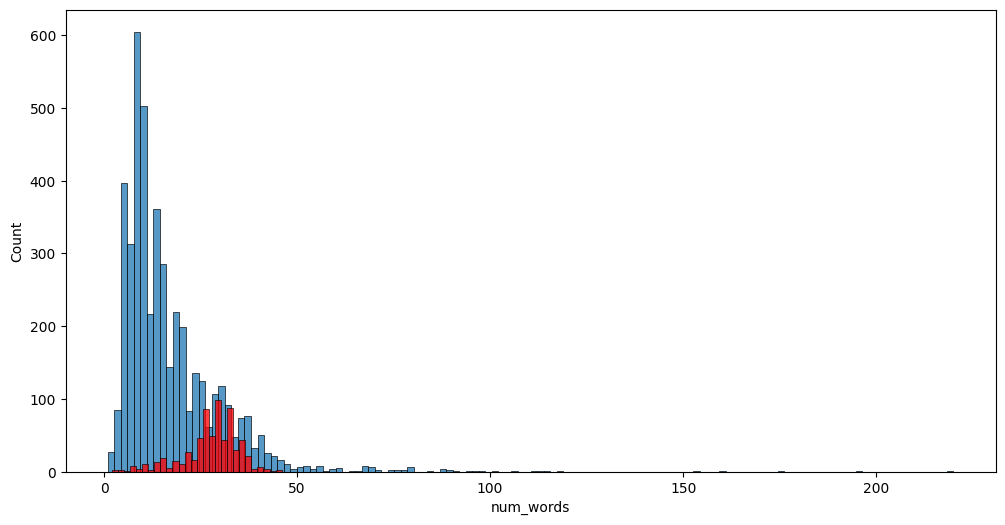

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

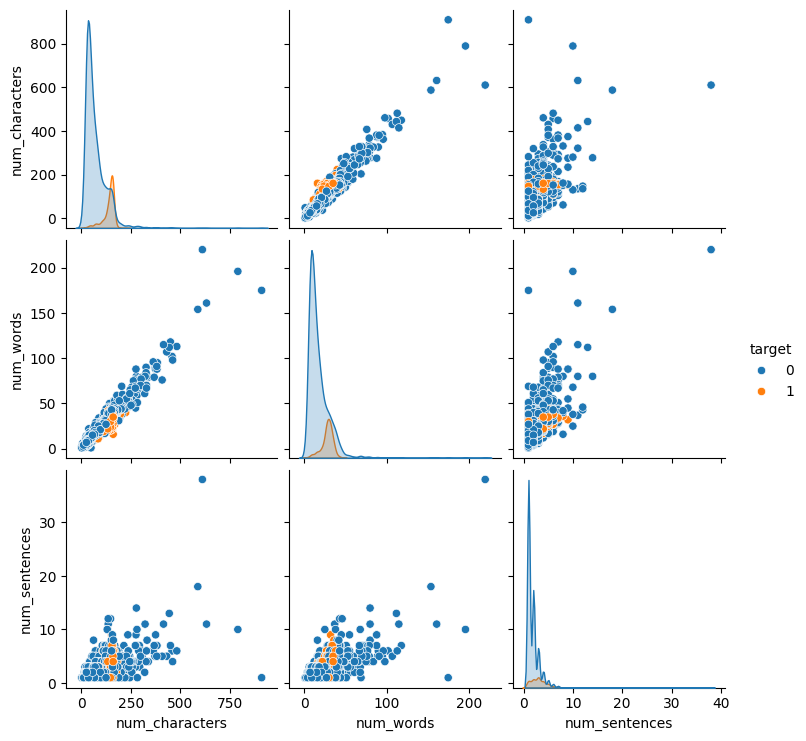

In [49]:
sns.pairplot(df,hue='target')

<Axes: >

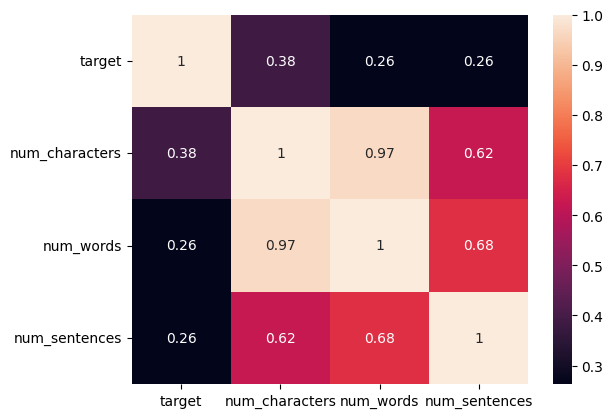

In [50]:
numeric_columns = df.select_dtypes(include='number')
sns.heatmap(numeric_columns.corr(), annot=True)

#sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

In [51]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# Initialize the PorterStemmer outside the function
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    
    # Print or log the words before stemming
    #print("Words before stemming:", words)
    
    words = [ps.stem(i) for i in words if i.isalnum()]
    
    return " ".join(words)


# Example usage:
transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)


i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today


In [53]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [54]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [55]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [56]:
df['transformed_text'] = df['text'].apply(transform_text)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [62]:
import wordcloud
wc = wordcloud.WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [63]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

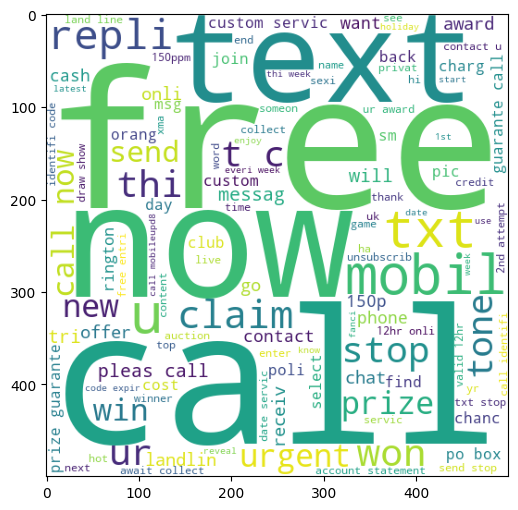

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

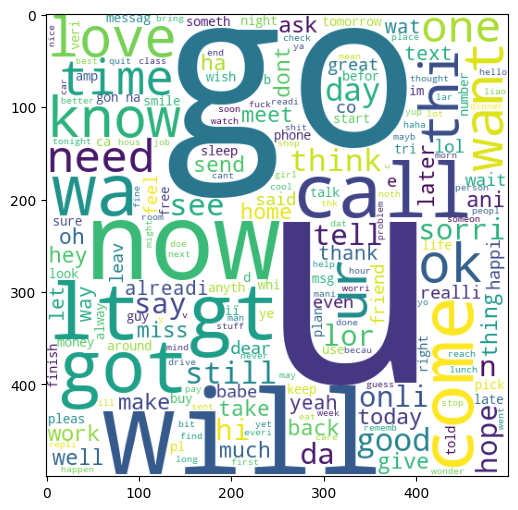

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [68]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [69]:
len(spam_corpus)

14475

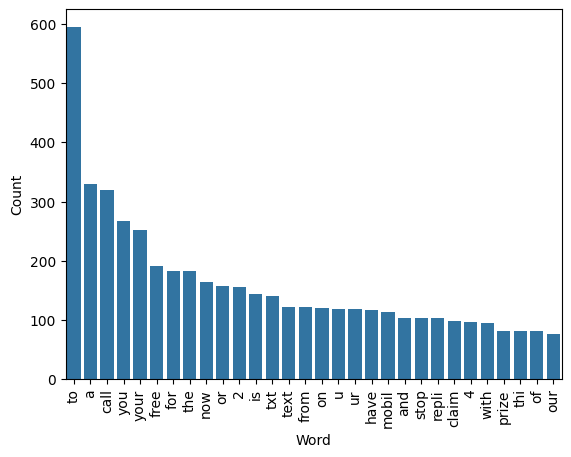

In [70]:
from collections import Counter
import seaborn as sns

# Assuming spam_corpus is a list or iterable containing your data
# Replace 'spam_corpus' with your actual variable name

# Create a Counter object to count occurrences
counter = Counter(spam_corpus)

# Convert the Counter data to a DataFrame
df_counter = pd.DataFrame(counter.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()


In [71]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [72]:
len(ham_corpus)

62812

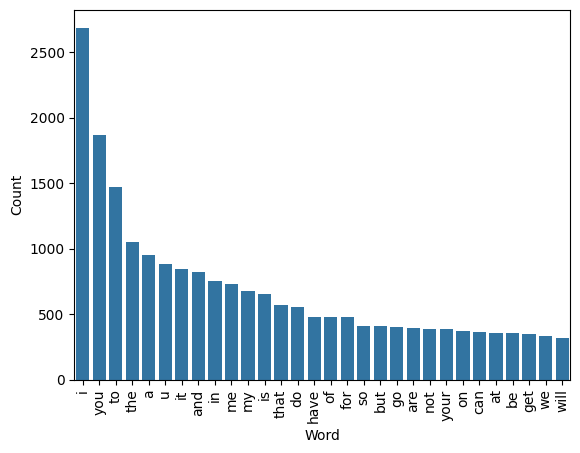

In [73]:
from collections import Counter
# Create a Counter object to count occurrences
counter = Counter(ham_corpus)

# Convert the Counter data to a DataFrame
df_counter = pd.DataFrame(counter.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


## 4. Model Building

In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [76]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [77]:
X.shape

(5169, 5000)

In [78]:
y = df['target'].values

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [82]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [83]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8849129593810445
[[802  94]
 [ 25 113]]
0.5458937198067633


In [84]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9574468085106383
[[896   0]
 [ 44  94]]
1.0


In [85]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[894   2]
 [ 18 120]]
0.9836065573770492


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [87]:
#SPAMS
#Congratulations! You've won $1 million in the international lottery. Claim your prize by providing your bank details.
#win a free iPhone! click here.
#"Congratulations! You've won a free cruise. Call now to claim your prize!"
#"URGENT: You've been selected to win a $1000 gift card. Claim now!"

In [88]:
#"hey sorry i missed dinner.hope you are not mad at me"
#"Reminder: Meeting tomorrow at 2 PM in the conference room."

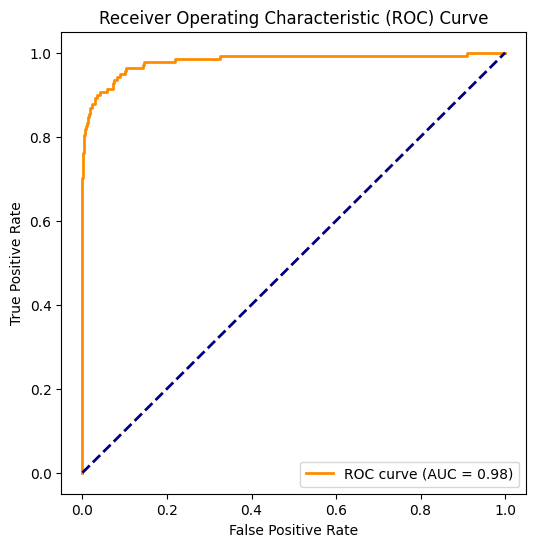

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the model and get predicted probabilities
mnb.fit(X_train, y_train)
y_prob = mnb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [90]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Fit the model and get predicted probabilities
mnb.fit(X_train, y_train)
y_prob = mnb.predict_proba(X_test)[:, 1]

# Set a threshold for classification
threshold = 0.5
y_pred_binary = (y_prob >= threshold).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[896   0]
 [ 44  94]]
